In [1]:
import os
from ase.io import read, write

In [2]:
data_path_0 = 'data/engrad_outcars/job_gen_0'
data_path_1 = 'data/engrad_outcars/job_gen_1'

In [3]:
new_frames = []
data_paths = [data_path_0, data_path_1]
for data_path in data_paths:
    # go through each directory and look for a file named OUTCAR
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file == 'OUTCAR':
                # read the OUTCAR file
                outcar = os.path.join(root, file)
                atoms = read(outcar, index=':')
                # write the atoms object to a file
                new_frames.extend(atoms)

In [5]:
# write the new frames to a file
write('data/engrad_outcars/gen_0_1_engrads.xyz', new_frames)

# Make Pure Vanadium, Chromium, and Titanium Data

## Testing tungsten

In [3]:
from ase.io import read 
import matplotlib.pyplot as plt

data = read('../data/db_W.xyz', index=':')

atom_lengths = []
for atoms in data:
    #print(atoms)
    #print(len(atoms))
    #print(atoms.get_potential_energy())
    atom_lengths.append(len(atoms))


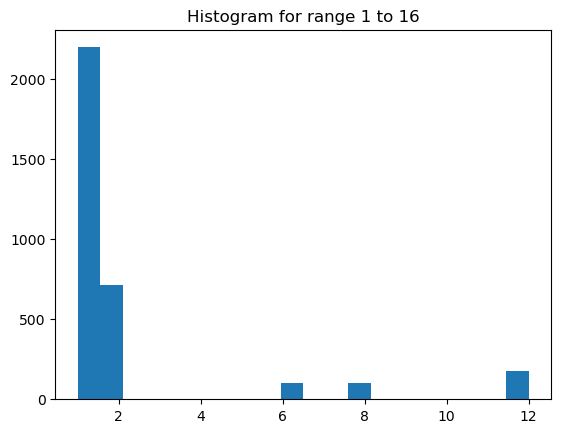

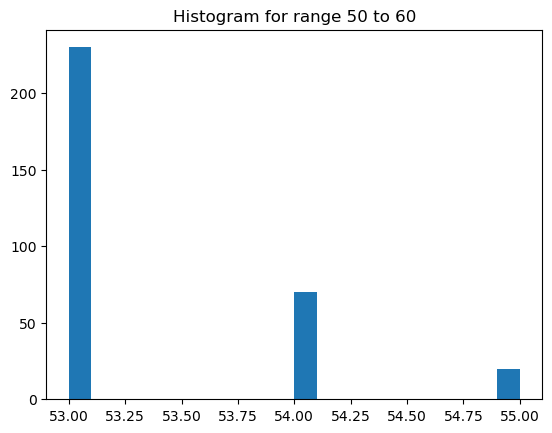

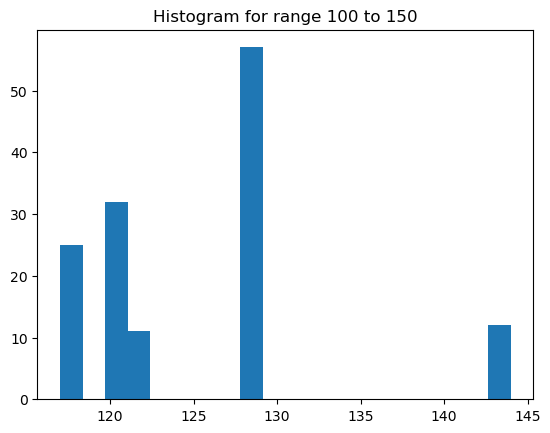

In [7]:
import matplotlib.pyplot as plt

# Assuming atom_lengths is a list or array of data
# Filter the data into three subsets
subset1 = [x for x in atom_lengths if 1 <= x <= 16]
subset2 = [x for x in atom_lengths if 50 <= x <= 60]
subset3 = [x for x in atom_lengths if 100 <= x <= 150]

# Plot the first histogram
plt.hist(subset1, bins=20)
plt.title('Histogram for range 1 to 16')
plt.show()

# Plot the second histogram
plt.hist(subset2, bins=20)
plt.title('Histogram for range 50 to 60')
plt.show()

# Plot the third histogram
plt.hist(subset3, bins=20)
plt.title('Histogram for range 100 to 150')
plt.show()

In [30]:
from ase import Atoms
from ase.io import read, write
import copy

# Read the original data
data = read('../data/db_W.xyz', index=':')

# Create deep copies for each element
data_V = copy.deepcopy(data)
data_Cr = copy.deepcopy(data)
data_Ti = copy.deepcopy(data)
data_Zr = copy.deepcopy(data)

# Function to change atomic numbers
def change_atomic_number(atoms, new_element):
    new_atomic_number = Atoms(new_element).numbers[0]
    atoms.numbers[:] = new_atomic_number

# Change atomic numbers for each dataset
for atoms in data_V:
    change_atomic_number(atoms, 'V')

for atoms in data_Cr:
    change_atomic_number(atoms, 'Cr')

for atoms in data_Ti:
    change_atomic_number(atoms, 'Ti')

for atoms in data_Zr:
    change_atomic_number(atoms, 'Zr')

# Save the new datasets
write('db_V.xyz', data_V)
write('db_Cr.xyz', data_Cr)
write('db_Ti.xyz', data_Ti)
write('db_Zr.xyz', data_Zr)

# Verify the changes (optional)
print("Original W data:")
print(data[0].numbers)

print("\nV data:")
print(data_V[0].numbers)

print("\nCr data:")
print(data_Cr[0].numbers)

print("\nTi data:")
print(data_Ti[0].numbers)

print("\nZr data:")
print(data_Zr[0].numbers)

Original W data:
[74]

V data:
[23]

Cr data:
[24]

Ti data:
[22]

Zr data:
[40]


In [3]:
from ase.io import read
#neb_data = read('../data/zr-w-v-cr-ti/all-test/22-10-2024_NEB_unsplit_all.xyz', index=':')
neb_data = read('../data/zr-w-v-cr-ti/all-test/vcrtiwzr_neb_noos_sampled_20per-22-10-2024.extxyz',index=':')

In [4]:
print(neb_data[0].get_chemical_symbols())

['Zr', 'Zr', 'Zr', 'Zr', 'Zr', 'Zr', 'Zr', 'Zr', 'Zr', 'Zr', 'Zr', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'W', 'W']


In [11]:
cohesive_energies = {'V' : -8.9570740632,
                     'Ti' : -7.6933483733,
                     'Cr' :   -9.5135640945,
                     'W' : -12.9589697286,
                     'Zr' : -8.4379360614
}

def normalize_energy(atoms_list, cohesive_energies):
    for i,atoms in enumerate(atoms_list):
        # get the number of each atom element
        elements = atoms.get_chemical_symbols()
        
        # calculate the number of each element in the elements list and make a dictionary
        element_count = {i:elements.count(i) for i in elements}
        print(f"Atoms object {i} has elements {element_count}")
        total_energy = atoms.get_potential_energy()
        # calculate the residual energy of the atoms object 
        residual_energy = total_energy - sum([element_count[i]*cohesive_energies[i] for i in element_count])

        print(f'Atoms object {i} has residual energy {residual_energy}, total energy {total_energy}')

        atoms.info['residual_energy'] = residual_energy

In [12]:
normalize_energy(neb_data, cohesive_energies)

Atoms object 0 has elements {'Zr': 11, 'Ti': 13, 'V': 88, 'Cr': 10, 'W': 2}
Atoms object 0 has residual energy 10.088121842100236, total energy -1092.01880165
Atoms object 1 has elements {'Zr': 11, 'Ti': 14, 'V': 88, 'Cr': 9, 'W': 2}
Atoms object 1 has residual energy 9.244975480899939, total energy -1091.04173229
Atoms object 2 has elements {'Zr': 11, 'Ti': 13, 'V': 88, 'Cr': 10, 'W': 2}
Atoms object 2 has residual energy 9.72506788210012, total energy -1092.38185561
Atoms object 3 has elements {'Zr': 11, 'Ti': 14, 'V': 87, 'Cr': 10, 'W': 2}
Atoms object 3 has residual energy 8.741561692199866, total energy -1092.10163611
Atoms object 4 has elements {'Zr': 8, 'Ti': 15, 'V': 93, 'Cr': 5, 'W': 3}
Atoms object 4 has residual energy 7.887212896600204, total energy -1094.46911873
Atoms object 5 has elements {'Zr': 11, 'Ti': 14, 'V': 88, 'Cr': 9, 'W': 2}
Atoms object 5 has residual energy 8.732021040900008, total energy -1091.55468673
Atoms object 6 has elements {'Zr': 11, 'Ti': 14, 'V': 88

In [14]:
from ase.io import write
write('vcrtiwzr_neb_noos_sampled_20per_residual_energy-22-10-2024.extxyz', neb_data)